# Imports

In [1]:
# pandas,numpy
import numpy as np
import pandas as pd

# matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model selection
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,precision_score

In [2]:
#Read train & test data as a DataFrame
data=pd.read_csv("E:/kaggle_data/Loan_Approval/train_data.csv")
kaggle=pd.read_csv("E:/kaggle_data/Loan_Approval/test_data.csv")

In [3]:
#Extract Target variable and Concatenate Our data
data.loc[:,'Approval']=0
data.loc[data['Loan_Status']=='Y','Approval']=1
ydf=data[['Approval']]
data=data.drop(['Loan_Status','Approval'],axis=1)
full=pd.concat([data,kaggle])
full.index=range(981)

In [4]:
#preview the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [5]:
data.info()
print("----------------------------")
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null objec

In [6]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction

ID=kaggle['Loan_ID']
del full['Loan_ID']

In [7]:
# null value prediction
def null_predict(data):
    total=data.isnull().sum().sort_values(ascending=False)    
    percentage=((data.isnull().sum()*100)/data.isnull().count()).sort_values(ascending=False)
    missing=pd.concat([total,percentage],axis=1,keys=['Total','Percent'])
    return missing    
null_predict(data)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000


In [8]:
full.loc[((full['Education']=='Graduate') & (full['Self_Employed']=='No') & (full['Credit_History']==1.0) & (full['Dependents'].isnull())),:]          

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
684,Female,No,NaN,Graduate,No,3250,0.0,95.0,360.0,1.0,Semiurban
725,Male,Yes,NaN,Graduate,No,4082,0.0,93.0,360.0,1.0,Semiurban
752,NaN,No,NaN,Graduate,No,3333,1250.0,110.0,360.0,1.0,Semiurban


In [9]:
# After some observation,we can say
full.loc[(full['Married'].isnull())&(full['Gender']=='Female'),'Married']='Yes'
full.loc[(full['Married'].isnull())&(full['Gender']=='Male')&(full['Property_Area']=='Semiurban'),'Married']='Yes'
full.loc[(full['Married'].isnull())&(full['Gender']=='Male')&(full['Property_Area']=='Urban'),'Married']='No'

In [10]:
full['Married'].isnull().sum()

0

In [11]:
# make a temporary dataframe
temp=full.copy()

Need to check correaltion b/w features 

In [12]:
# Create new feature "Gender1"
temp['Gender1']=np.nan
temp.loc[temp['Gender']=='Male','Gender1']=0 
temp.loc[temp['Gender']=='Female','Gender1']=1
temp.Gender1.value_counts(dropna=False)

 0.0    775
 1.0    182
NaN      24
Name: Gender1, dtype: int64

In [13]:
# Create new feature "Married1"
temp.loc[:,'Married1']=0
temp.loc[temp['Married']=='Yes','Married1']=1
temp.Married1.value_counts(dropna=False)

1    633
0    348
Name: Married1, dtype: int64

In [14]:
# Create new feature "Education1"
temp.loc[:,'Education1']=0
temp.loc[temp['Education']=='Graduate','Education1']=1
temp.Education1.value_counts(dropna=False)

1    763
0    218
Name: Education1, dtype: int64

In [15]:
# Create new feature "Employed"
temp['Employed']=np.nan
temp.loc[temp['Self_Employed']=='No','Employed']=0
temp.loc[temp['Self_Employed']=='Yes','Employed']=1
temp.Employed.value_counts(dropna=False)

 0.0    807
 1.0    119
NaN      55
Name: Employed, dtype: int64

In [16]:
# Create new feature "Property"
temp['Property']=0
temp.loc[temp['Property_Area']=='Semiurban','Property']=1
temp.loc[temp['Property_Area']=='Urban','Property']=2
temp.Property.value_counts(dropna=False)

1    349
2    342
0    290
Name: Property, dtype: int64

In [17]:
# Create new feature "dependent"
temp.loc[:,'dependent']=0
temp.loc[temp['Dependents']=='1','dependent']=1
temp.loc[temp['Dependents']=='2','dependent']=2
temp.loc[temp['Dependents']=='3+','dependent']=3
temp.dependent.value_counts(dropna=False)

0    570
2    160
1    160
3     91
Name: dependent, dtype: int64

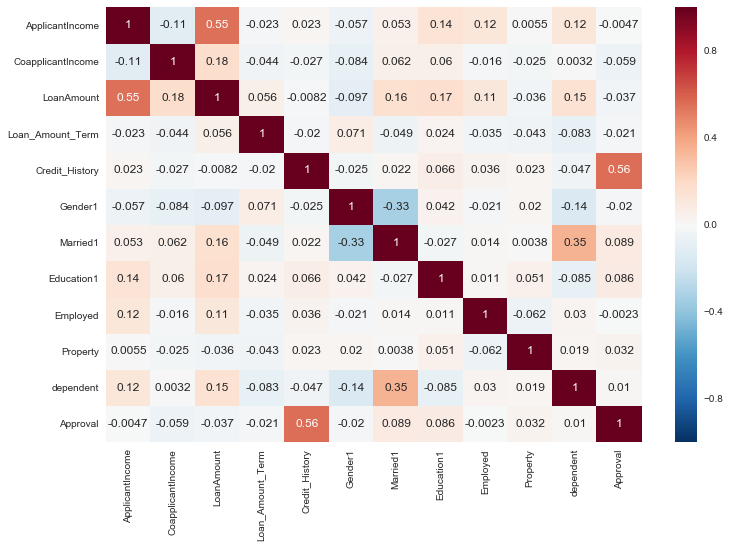

In [18]:
# Pearson Correlation
temp=pd.concat([temp,ydf],axis=1)
corra=temp.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corra,annot=True)
plt.show()

In [19]:
# Fill NaN values in LoanAmount with Mean
indi=full.loc[full['LoanAmount'].isnull(),'LoanAmount'].index
full.loc[full['LoanAmount'].isnull(),'LoanAmount']=int(full['LoanAmount'].mean())

# Imputations 

In [20]:
# Imputing null values for Gender

trt=full.loc[full['Gender'].notnull(),['Married','Dependents']]
tst=full.loc[full['Gender'].isnull(),['Married','Dependents']]
yr=full.loc[full['Gender'].notnull(),'Gender']
tr=pd.get_dummies(trt)
ts=pd.get_dummies(tst)

model=KNC()
model.fit(tr,yr)
pred=model.predict(ts)
print(pred)
full.loc[full['Gender'].isnull(),'Gender']=pred

['Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male']


In [21]:
# Imputing null values for Self Employed

trt2=full.loc[full['Self_Employed'].notnull(),['ApplicantIncome','LoanAmount','Property_Area']]
tst2=full.loc[full['Self_Employed'].isnull(),['ApplicantIncome','LoanAmount','Property_Area']]
yr2=full.loc[full['Self_Employed'].notnull(),'Self_Employed']
tr2=pd.get_dummies(trt2)
ts2=pd.get_dummies(tst2)

model2=KNC()
model2.fit(tr2,yr2)
pred2=model2.predict(ts2)
print(pred2)
full.loc[full['Self_Employed'].isnull(),'Self_Employed']=pred2

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No']


In [22]:
# Imputing null values for Dependents

trt3=full.loc[full['Dependents'].notnull(),['Married','Gender','LoanAmount','ApplicantIncome']]
tst3=full.loc[full['Dependents'].isnull(),['Married','Gender','LoanAmount','ApplicantIncome']]
yr3=full.loc[full['Dependents'].notnull(),'Dependents']
tr3=pd.get_dummies(trt3)
ts3=pd.get_dummies(tst3)

model3=KNC()
model3.fit(tr3,yr3)
pred3=model3.predict(ts3)
print(pred3)
full.loc[full['Dependents'].isnull(),'Dependents']=pred3


['0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0']


In [23]:
# Imputing null values for Loan_Amount_Term

trt4=full.loc[full['Loan_Amount_Term'].notnull(),['Gender','LoanAmount','Dependents','Married']]
tst4=full.loc[full['Loan_Amount_Term'].isnull(),['Gender','LoanAmount','Dependents','Married']]
yr4=full.loc[full['Loan_Amount_Term'].notnull(),'Loan_Amount_Term']
tr4=pd.get_dummies(trt4)
ts4=pd.get_dummies(tst4)
del tr4['Dependents_2']

model4=KNR()
model4.fit(tr4,yr4)
pred4=model4.predict(ts4)
print(pred4)
full.loc[full['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=pred4


[ 324.   384.   360.   360.   384.   360.   324.   360.   312.   324.   252.
  312.   295.2  324.   324.   360.   312.   276.   360.   295.2]


In [24]:
# Imputing null values for Credit_History 

trt5=full.loc[full['Credit_History'].notnull(),['Education','Dependents','Self_Employed']]
tst5=full.loc[full['Credit_History'].isnull(),['Education','Dependents','Self_Employed']]
yr5=full.loc[full['Credit_History'].notnull(),'Credit_History']
tr5=pd.get_dummies(trt5)
ts5=pd.get_dummies(tst5)

model5=KNC()
model5.fit(tr5,yr5)
pred5=model5.predict(ts5)
print(pred5)
full.loc[full['Credit_History'].isnull(),'Credit_History']=pred5

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.
  1.  1.  0.  1.  1.  1.  1.]


In [25]:
full.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,142.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban


# First Model

In [26]:
# Extraxt data drom full data

data=full.loc[0:613]
kaggle=full.loc[614:981]
Y=np.ravel(ydf)

In [27]:
# train-Test split & get dummy variables

train_x,test_x,train_y,test_y=train_test_split(data,Y,test_size=0.33,random_state=2)
train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [28]:
RF=RandomForestClassifier(n_estimators=100,random_state=42)
RF.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
# Score for train data

RF.score(train_x,train_y)

1.0

In [30]:
# Score for test data

RF.score(test_x,test_y)

0.77339901477832518

Perfect case for overfitting data

In [31]:
## Feature Importance

a=RF.feature_importances_
b=train_x.columns
d={}
for i in range(8):
    d[b[i]]=a[i]

pd.DataFrame(d,index=range(1))    

,ApplicantIncome,CoapplicantIncome,Credit_History,Gender_Female,Gender_Male,LoanAmount,Loan_Amount_Term,Married_No
0,0.18485,0.117217,0.230466,0.014202,0.012951,0.172055,0.053941,0.016531


In [32]:
# lets take feature one by one

temp1=data[['Credit_History']]
train_x,test_x,train_y,test_y=train_test_split(temp1,Y,test_size=0.33,random_state=2)
train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [33]:
GBM=GradientBoostingClassifier(random_state=10)
GBM.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [34]:
GBM.score(train_x,train_y)

0.81021897810218979

In [35]:
GBM.score(test_x,test_y)

0.78817733990147787

Decent score..move ahead

In [36]:
# lets take two feature

temp2=data[['Credit_History','Married']]
train_x,test_x,train_y,test_y=train_test_split(temp2,Y,test_size=0.33,random_state=2)
train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [37]:
GBM=GradientBoostingClassifier(random_state=10)
GBM.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [38]:
GBM.score(train_x,train_y)

0.81021897810218979

In [39]:
GBM.score(test_x,test_y)

0.78817733990147787

Score unchanged...Don't add

In [40]:
# lets take Education this time

temp3=data[['Credit_History','Education','CoapplicantIncome']]
train_x,test_x,train_y,test_y=train_test_split(temp3,Y,test_size=0.33,random_state=2)
train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [41]:
GBM=GradientBoostingClassifier(random_state=10)
GBM.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [42]:
GBM.score(train_x,train_y)

0.86131386861313863

In [43]:
GBM.score(test_x,test_y)

0.77339901477832518

Going to less overfit so add it

In [44]:
# lets take LoanAmount this time

temp3=data[['Credit_History','Education','LoanAmount']]
train_x,test_x,train_y,test_y=train_test_split(temp3,Y,test_size=0.33,random_state=2)
train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [45]:
GBM=GradientBoostingClassifier(random_state=10)
GBM.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
GBM.score(train_x,train_y)

0.85644768856447684

In [47]:
GBM.score(test_x,test_y)

0.74384236453201968

Overfitting increases so not gonna add

In [51]:
# let take all efficient features 

temp3=data[['Credit_History','LoanAmount']]
train_x,test_x,train_y,test_y=train_test_split(temp3,Y,test_size=0.33,random_state=2)
train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [52]:
SVM=SVC(kernel='linear')
SVM.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
SVM.score(train_x,train_y)

0.81021897810218979

In [54]:
SVM.score(test_x,test_y)

0.78817733990147787

In [55]:
predii=SVM.predict(test_x)

In [56]:
precision_score(y_true=test_y,y_pred=predii)

0.77456647398843925